## 랜덤 포레스트 (분류)

<br>

<b>분류의 경우</b>
> sklearn.ensemble.RandomForestClassifier(...)


- n_estimators : RandomForest에서 나무의 수 (int, default = 100)<br>
- criterion : 분할의 품질을 측정하는 방법 ({“gini”, “entropy”}, default=”gini”)<br>
- max_depth : 나무의 최대 깊이. (int, default = None)<br>
&emsp; &emsp;&emsp; &emsp;&emsp; None이면 모든 잎이 순수하거나 잎에 min_sample_split 미만의 샘플만 존재할 때까지 노드 확장<br>
- min_samples_split : 내부 노드를 분할하는 데 필요한 최소 샘플 수 (int or float, default=2)<br>
- min_samples_leaf : 리프 노드에 있어야하는 최소 샘플 수 (int or float, default=1)<br>
- max_leaf_nodes : 리프 노드의 최대 개수 (int, default = None)<br>
&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; None이면 리프 노드 수에 제한이 없음<br>
- bootstrap : 나무를 만들 때 부트 스트랩 샘플이 사용되는지 여부 (bool, default=True)<br>
&emsp;&emsp;&emsp;&emsp;&emsp; False이면 전체 데이터 세트가 각 트리를 작성하는 데 사용<br>
- oob_score : 정확도 측정을 위해 out-of-bag 샘플을 사용할지 여부 (bool, default=False)<br>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("../data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("정확도 : ", clf.score(X_test, y_test))

정확도 :  0.75


In [3]:
from sklearn.metrics import confusion_matrix # 오차행렬
# 정밀도, 재현율, F1 스코어 : f1_score(test_y, pred)로 사용
from sklearn.metrics import precision_score, recall_score, f1_score 

print(f"정밀도 : {precision_score(y_test, y_pred)}")
print(f"재현율 : {recall_score(y_test, y_pred)}")
print(f"F1 스코어 : {f1_score(y_test, y_pred)}")

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

정밀도 : 0.7622950819672131
재현율 : 0.916256157635468
F1 스코어 : 0.8322147651006712


,Pred[0],Pred[1]
True[0],39,58
True[1],17,186


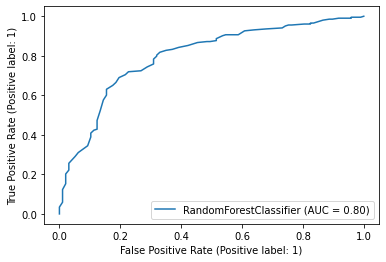

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)
plt.show()

In [5]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(2,10,2) , 'min_samples_leaf':range(2,10,2)}
model_grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
model_grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 10, 2)})

In [12]:
model_grid_rf.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=1131141126),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=1017270872),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=883091180),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=430981363),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=215587385),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=851469035),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random_state=2055518662),
 DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=6,
                        random

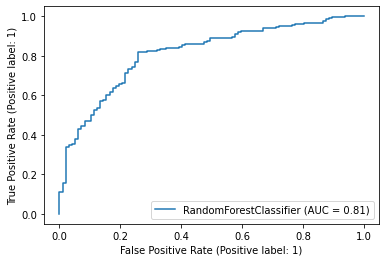

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_grid_rf.best_estimator_, X_test, y_test)
plt.show()

In [14]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_rf.best_estimator_.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances


,col_name,feature_importance
0,account.balance,0.177999
1,credit.duration.months,0.137278
2,credit.amount,0.135054
3,previous.credit.payment.status,0.085613
4,age,0.075389
5,savings,0.054971
6,current.assets,0.051608
7,credit.purpose,0.046984
8,employment.duration,0.042640
9,installment.rate,0.036786


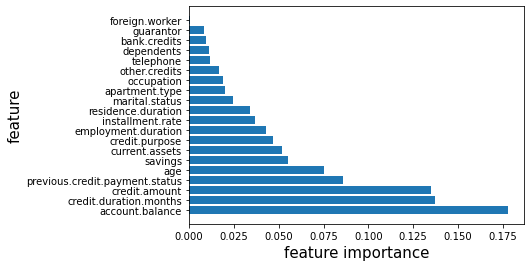

In [15]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()